In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 1A

1. Implement the KNN algorithm manually with k=3 to classify a new fruit with a weight of 165 grams
and sweetness level of 5.5.
2. Calculate the Euclidean, Manhattan, and Minkowski distances between the new fruit and all the
existing fruits in the dataset. Finally compare the calculated distances.
3. Based on the k-nearest neighbors, determine the label for the new fruit.
4. What is the effect of choosing different values of k (e.g., k=1, k=5) on the classification result?
5. Implement the above using function python program without using scikit learn library.
6. Plot the given samples, the Apple in Red color and the Orange in orange color. Also draw the
decision boundary.

In [28]:
data=pd.read_csv('data1.csv')
labels=data['Label'].unique()
label_map={}
c=1
for label in labels:
    label_map[label]=c
    c+=1
label_map

{'Apple': 1, 'Orange': 2}

In [179]:
y=data['Label']
y1=y.map(label_map)
X=data.drop(columns=['Fruit_ID','Label'])
new_fruit1=[165,5.5]
X,y
X_array=np.array(X)
X_array

array([[180,   7],
       [200,   6],
       [150,   4],
       [170,   5],
       [160,   6],
       [140,   3]])

In [172]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

def minkowski_distance(point1, point2, p):
    return np.power(np.sum(np.abs(point1 - point2) ** p), 1/p)

In [173]:
def knn_predict(X, y, new_point, k=3):
    distances = []

    for i in range(len(X)):
        distance = euclidean_distance(X[i], new_point)
        distances.append((distance, y[i]))  # Store distance and corresponding label

    distances.sort(key=lambda x: x[0])

    k_nearest_labels = [label for _, label in distances[:k]]
    label_counts = {}
    for label in k_nearest_labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

    predicted_label = max(label_counts, key=label_counts.get)
    return predicted_label

In [174]:
predicted_label = knn_predict(X_array, y, new_fruit1, k=3)
print("Predicted Label:", predicted_label)

Predicted Label: Apple


In [175]:
euclidean_distances = []
manhattan_distances = []
minkowski_distances = []

for fruit in X_array:
    euclidean_distances.append(euclidean_distance(fruit, new_fruit1))
    manhattan_distances.append(manhattan_distance(fruit, new_fruit1))
    minkowski_distances.append(minkowski_distance(fruit, new_fruit1, p=3))  # Example with p=3

distances_df = pd.DataFrame({
    'Euclidean': euclidean_distances,
    'Manhattan': manhattan_distances,
    'Minkowski (p=3)': minkowski_distances
}, index=data['Label'])

print("Distances from New Fruit:")
print(distances_df)


Distances from New Fruit:
        Euclidean  Manhattan  Minkowski (p=3)
Label                                        
Apple   15.074813       16.5        15.004998
Apple   35.003571       35.5        35.000034
Orange  15.074813       16.5        15.004998
Orange   5.024938        5.5         5.001666
Apple    5.024938        5.5         5.001666
Orange  25.124689       27.5        25.008331


In [176]:
predicted_label = knn_predict(X_array, y, new_fruit1, k=1)
print("Predicted Label(k=1):", predicted_label)

predicted_label = knn_predict(X_array, y, new_fruit1, k=5)
print("Predicted Label(k=5):", predicted_label)

Predicted Label(k=1): Orange
Predicted Label(k=5): Orange


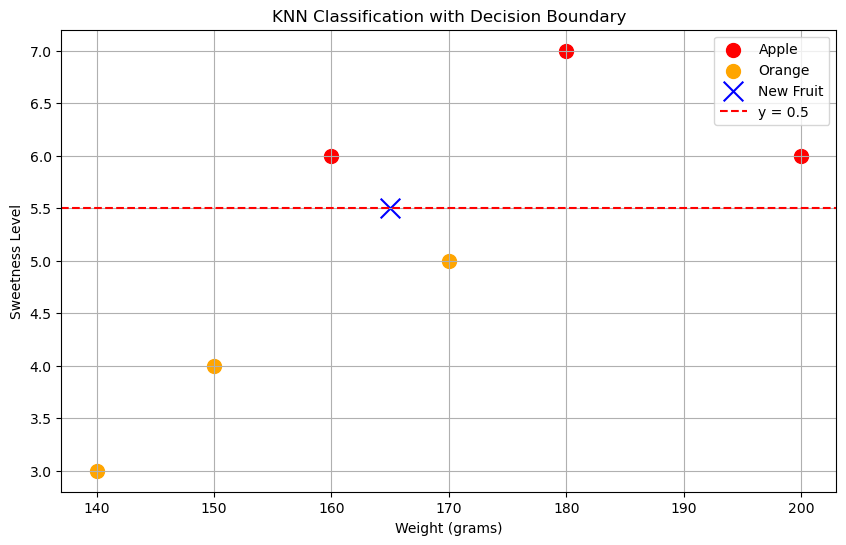

In [180]:
plt.figure(figsize=(10, 6))
plt.scatter(X_array[y1 == 1,0], X_array[y1 == 1, 1], color='red', label='Apple', s=100)
plt.scatter(X_array[y1 == 2, 0], X_array[y1 == 2, 1], color='orange', label='Orange', s=100)
plt.scatter(new_fruit1[0], new_fruit1[1], color='blue', marker='x', s=200, label='New Fruit')
plt.axhline(y=5.5, color='r', linestyle='--', label='y = 0.5')


plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.title('KNN Classification with Decision Boundary')
plt.legend()
plt.grid()
plt.show()

# Question 1B

Implement the Python code for Q-1. A using the scikit-learn library. Plot the given samples, using red for
"Apple" and orange for "Orange." Also, plot the decision boundary. Calculate the distances using Euclidean,
Manhattan, and Minkowski metrics, and compare the results.

In [181]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances
k = 3
new_fruit = np.array([[165, 5.5]])
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_array, y)

for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_array, y)
    pred = knn.predict(new_fruit)
    print(f"Predicted Label (k={k}):", pred)

Predicted Label (k=1): ['Orange']
Predicted Label (k=3): ['Orange']
Predicted Label (k=5): ['Orange']


Distances from New Fruit:
        Euclidean  Manhattan  Minkowski (p=2)
Label                                        
Apple   15.074813       16.5        15.004998
Apple   35.003571       35.5        35.000034
Orange  15.074813       16.5        15.004998
Orange   5.024938        5.5         5.001666
Apple    5.024938        5.5         5.001666
Orange  25.124689       27.5        25.008331


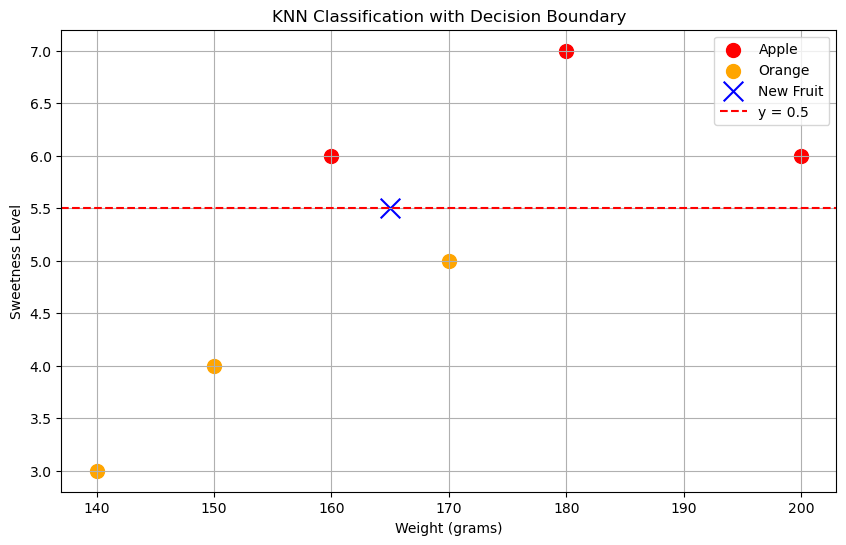

In [183]:
euclidean_distances = pairwise_distances(X_array, new_fruit, metric='euclidean')
manhattan_distances = pairwise_distances(X_array, new_fruit, metric='manhattan')
minkowski_distances = pairwise_distances(X_array, new_fruit, metric='minkowski', p=3)  # Example with p=3

distances_df = pd.DataFrame({
    'Euclidean': euclidean_distances.flatten(),
    'Manhattan': manhattan_distances.flatten(),
    'Minkowski (p=2)': minkowski_distances.flatten()
},index=data['Label'])

print("Distances from New Fruit:")
print(distances_df)

plt.figure(figsize=(10, 6))
plt.scatter(X_array[y1 == 1,0], X_array[y1 == 1, 1], color='red', label='Apple', s=100)
plt.scatter(X_array[y1 == 2, 0], X_array[y1 == 2, 1], color='orange', label='Orange', s=100)
plt.scatter(new_fruit[0][0], new_fruit[0][1], color='blue', marker='x', s=200, label='New Fruit')
plt.axhline(y=5.5, color='r', linestyle='--', label='y = 0.5')
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.title('KNN Classification with Decision Boundary')
plt.legend()
plt.grid()
plt.show()

# Question 2A

1. Calculate the entropy for the target variable (Diagnosis).
2. Calculate the information gain for each feature (Age, Blood Pressure, Cholesterol).3. Using the ID3 algorithm, decide which feature should be chosen as the root node for the decision
tree.
4. Build the decision tree and explain the first few splits.
5. Predict whether a 50-year-old patient with low blood pressure and normal cholesterol is healthy or
sick using the tree you built.
6. Implement the above using function python program without using scikit learn library.

In [184]:
df = pd.read_csv("data2.csv")
df

,Age,Blood Pressure,Cholesterol,Diagnosis
0,30,High,High,Sick
1,45,Low,Normal,Healthy
2,50,High,High,Sick
3,35,Low,Normal,Healthy
4,60,High,High,Sick
5,55,Low,Normal,Healthy
6,40,High,High,Sick
7,25,Low,Normal,Healthy
8,65,High,High,Sick
9,45,Low,Normal,Healthy


In [185]:
def calculate_entropy(target):
    values = target.value_counts(normalize=True)
    entropy = -np.sum(values * np.log2(values + 1e-9))
    return entropy

def calculate_information_gain(df, feature, target):
    total_entropy = calculate_entropy(df[target])
    values = df[feature].value_counts(normalize=True)
    weighted_entropy = np.sum(values * df.groupby(feature)[target].apply(calculate_entropy))
    information_gain = total_entropy - weighted_entropy
    return information_gain

class Node:
    def __init__(self, feature=None, prediction=None):
        self.feature = feature
        self.prediction = prediction
        self.left = None
        self.right = None


In [186]:
# Step 1: Calculate entropy for the target variable (Diagnosis)
entropy_diagnosis = calculate_entropy(df['Diagnosis'])
print("Entropy of Diagnosis:", entropy_diagnosis)

Entropy of Diagnosis: 0.99999999711461


In [187]:
features = ['Age', 'Blood Pressure', 'Cholesterol']
information_gains = {feature: calculate_information_gain(df, feature, 'Diagnosis') for feature in features}

for feature, gain in information_gains.items():
    print(f"Information Gain for {feature}: {gain}")

Information Gain for Age: 0.9999999985573051
Information Gain for Blood Pressure: 0.9999999985573051
Information Gain for Cholesterol: 0.9999999985573051


In [188]:
root_feature = max(information_gains, key=information_gains.get)
print("Root Feature:", root_feature)

Root Feature: Age


In [189]:
def build_tree(df, target):
    if len(df[target].unique()) == 1:
        return Node(prediction=df[target].iloc[0])

    if df.empty or len(df.columns) == 1:
        return Node(prediction=df[target].mode()[0])

    best_feature = max(df.columns[:-1], key=lambda f: calculate_information_gain(df, f, target))
    tree = Node(feature=best_feature)

    for value in df[best_feature].unique():
        subset = df[df[best_feature] == value]
        
        if not subset.empty:
            subtree = build_tree(subset.drop(columns=[best_feature]), target)
            if value <= 40:  # Customize the condition based on your data
                tree.left = subtree
            else:
                tree.right = subtree

    return tree

def print_tree(node, depth=0):
    if node is not None:
        print_tree(node.left, depth + 1)
        if node.prediction is not None:
            print(f"{'  ' * depth}Predict: {node.prediction}")
        if node.feature is not None:
            print(f"{'  ' * depth}[{node.feature}]")
        print_tree(node.right, depth + 1)

tree = build_tree(df, 'Diagnosis')
print_tree(tree)

def predict(tree, instance):
    if tree.prediction is not None:
        return tree.prediction
    if instance[tree.feature] == tree.value:
        return predict(tree.left, instance)
    else:
        return predict(tree.right, instance)

new_patient = {'Age': 50, 'Blood Pressure': 'Low', 'Cholesterol': 'Normal'}
prediction = predict(decision_tree, new_patient)
print("Prediction for the new patient:", prediction)

  Predict: Healthy
[Age]
  Predict: Sick
Prediction for the new patient: Sick


# Question 2B

Implement the Python code for Q-2. A using the scikit-learn library. Using the ID3 algorithm, decide which
feature should be chosen as the root node for the decision tree. Build the decision tree and explain the first
few splits. Predict whether a 50-year-old patient with low blood pressure and normal cholesterol is healthy
or sick using the tree you built.

In [190]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text


# Convert categorical variables to numerical values
df['Blood Pressure'] = df['Blood Pressure'].map({'Low': 0, 'High': 1})
df['Cholesterol'] = df['Cholesterol'].map({'Normal': 0, 'High': 1})
df['Diagnosis'] = df['Diagnosis'].map({'Healthy': 0, 'Sick': 1})

# Split the data into features and target
X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']

# Create the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

# Get the decision tree structure
tree_structure = export_text(clf, feature_names=list(X.columns))
print(tree_structure)

# Patient data
patient_data = [[50, 0, 0]]  # Age, Blood Pressure, Cholesterol
prediction = clf.predict(patient_data)
diagnosis = 'Healthy' if prediction[0] == 0 else 'Sick'
print(f"The predicted diagnosis for the patient is: {diagnosis}")


|--- Cholesterol <= 0.50
|   |--- class: 0
|--- Cholesterol >  0.50
|   |--- class: 1

The predicted diagnosis for the patient is: Healthy


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
